<a href="https://colab.research.google.com/github/omerfarukpala/miuul/blob/main/divorced_case_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## EDA

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn import metrics
import matplotlib.pyplot as plt
#from cf_matrix import make_confusion_matrix
%matplotlib inline

In [115]:
HIDDEN_LAYER_SIZES = 12
MAX_ITER = 500
LABELS = ['True Neg','False Pos','False Neg','True Pos']
CATEGORIES = ['Married', 'Divorced']
TEST_SIZE = 0.8
SVM_TITLE = 'SVM 20-80 Confusion Matrix'
RF_TITLE = 'Random Forest 20-80 Confusion Matrix'
NN_TITLE = 'Neural Network 20-80 Confusion Matrix'

In [116]:
divorce = pd.read_csv('/content/sample_data/divorce-csv.csv')
display(divorce.sample(5))
display(divorce.describe())

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
117,0,0,0,0,0,1,0,1,1,0,...,0,0,2,1,2,2,3,3,2,0
146,2,1,1,0,0,1,0,0,0,0,...,1,1,3,0,0,0,0,0,0,0
158,0,1,0,1,0,0,0,0,0,1,...,0,1,3,2,2,2,1,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,1,1,0,0,0,0
65,3,3,3,2,3,1,1,3,3,2,...,3,4,3,4,4,3,4,3,4,1


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [117]:
divorce.shape

(170, 55)

0    86
1    84
Name: Class, dtype: int64


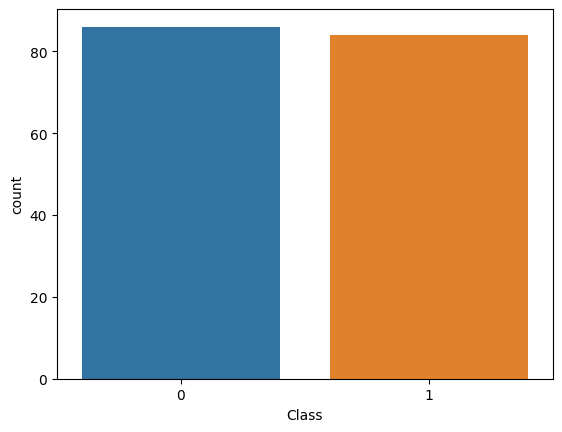

In [118]:
print(divorce['Class'].value_counts())

# Plot the count of each class
sns.countplot(x='Class', data=divorce)
plt.show()

In [119]:
divorce.dtypes.tail()

Atr51    int64
Atr52    int64
Atr53    int64
Atr54    int64
Class    int64
dtype: object

In [120]:
divorce.Atr1.value_counts()

0    69
3    47
4    31
2    14
1     9
Name: Atr1, dtype: int64

In [121]:
divorce['Class'].describe()

count    170.000000
mean       0.494118
std        0.501442
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [122]:
divorce.Atr1.unique()

array([2, 4, 3, 0, 1])

<Axes: >

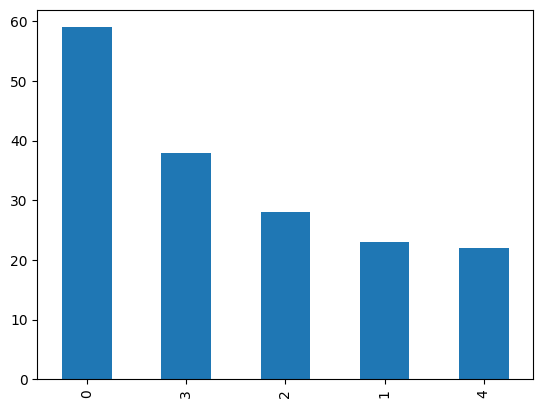

In [123]:
divorce.Atr2.value_counts().plot(kind='bar')

## Preprocessing

In [125]:
total = divorce.isnull().sum().sort_values(ascending=False)
total.head(10)

Atr1     0
Atr42    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
dtype: int64

In [126]:
X = divorce.drop('Class', axis=1)
y = divorce['Class']

In [127]:
display(X)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


In [128]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Class, Length: 170, dtype: int64

In [129]:
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Eğitim seti boyutu
print(X_train.shape)

# Test seti boyutu
print(X_test.shape)

(136, 54)
(34, 54)


In [130]:
#To normalise the values of the dataset to improve the model accuracy.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
display(X_train)

array([[ 1.44503015,  1.73741668,  1.63958014, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-1.05051398, -1.09238774, -0.48406652, ...,  0.34160509,
         0.53436582, -0.56225353],
       [ 0.19725808,  0.32251447,  0.2238157 , ..., -0.33170349,
        -0.14482812,  0.0446233 ],
       ...,
       [ 0.82114411,  1.73741668,  0.93169792, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-0.42662795, -0.38493663, -1.19194873, ..., -1.00501207,
        -0.82402205, -0.56225353],
       [-1.05051398, -1.09238774, -1.19194873, ...,  1.01491367,
        -0.82402205,  0.0446233 ]])

In [132]:
display(y_test)

139    0
30     1
119    0
29     1
144    0
163    0
166    0
51     1
105    0
60     1
15     1
158    0
135    0
45     1
68     1
85     0
24     1
109    0
75     1
108    0
19     1
16     1
31     1
18     1
12     1
9      1
82     1
98     0
76     1
55     1
42     1
56     1
150    0
111    0
Name: Class, dtype: int64

In [133]:
display(X_test)

array([[ 0.82114411, -0.38493663, -0.48406652, ..., -1.67832065,
        -1.50321599,  1.25837695],
       [ 0.82114411,  1.73741668,  0.93169792, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-1.05051398, -0.38493663, -0.48406652, ..., -1.00501207,
        -0.82402205, -1.16913036],
       ...,
       [ 0.82114411,  1.73741668,  0.93169792, ...,  0.34160509,
         0.53436582,  0.65150012],
       [-1.05051398,  1.02996558,  0.2238157 , ..., -0.33170349,
        -1.50321599, -0.56225353],
       [-0.42662795, -0.38493663, -0.48406652, ..., -1.00501207,
        -0.82402205, -1.16913036]])

## deneme

In [134]:
from sklearn.model_selection import train_test_split
# X, bağımsız değişkenlerin, y ise bağımlı değişkenin olduğu bir veri seti olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# test_size parametresi, test için ayrılacak veri oranını belirler
# random_state parametresi, veri setinin rastgele bölünmesini sağlar
# X_train ve y_train, eğitim için kullanılacak veri parçalarıdır
# X_test ve y_test, test için kullanılacak veri parçalarıdır

In [135]:
# Eğitim seti boyutu
print(X_train.shape)

# Test seti boyutu
print(X_test.shape)
print(y_test.shape)

(136, 54)
(34, 54)
(34,)


In [136]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() # GaussianNB sınıflandırıcısını oluşturuyoruz
gnb.fit(X_train, y_train) # Sınıflandırıcıyı eğitim verisiyle eğitiyoruz
y_pred = gnb.predict(X_test) # Test verisindeki veri noktalarını tahmin ediyoruz


In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Doğruluk, hassasiyet, geri çağırma ve F1 skorunu hesaplıyoruz
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Karışıklık matrisini oluşturuyoruz
cm = confusion_matrix(y_test, y_pred)
# Sonuçları ekrana yazdırıyoruz
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:", cm)


Accuracy: 0.9411764705882353
Precision: 0.95
Recall: 0.95
F1 score: 0.9500000000000001
Confusion matrix: [[13  1]
 [ 1 19]]


In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Confusion matrix görselini oluşturuyoruz
plot_confusion_matrix(gnb, X_test, y_test)
# Görseli gösteriyoruz
plt.show()


ImportError: ignored

## random forest

In [55]:
#to calculate time complexity
start = time.time()

#Create a RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
pred_rfc = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.9705882352941176

In [57]:
end = time.time()
print("Random-Forest execution time: {0:.5} seconds \n".format(end-start))

Random-Forest execution time: 4.427 seconds 



In [58]:
# classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [77]:
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [78]:
rf_cf_matrix = confusion_matrix(y_test, pred_rfc)
make_confusion_matrix(rf_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = RF_TITLE)

NameError: ignored

In [60]:
print(rf_cf_matrix)

[[14  0]
 [ 1 19]]


## xxxxx

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Veriyi okuma
data = pd.read_csv('/content/sample_data/divorce-csv.csv')

# Özellik isimlerini al
feature_names = data.columns

# 'Class' sütununu özellik isimlerinden çıkar
feature_names = feature_names.drop('Class')

# 40. sütun sonrasındaki sütunları çıkar (sınırlı sayıda özellik kullanma)
feature_names = feature_names.drop(feature_names[40:])

# Özellik ve hedef değişkenini ayır
X = data.drop('Class', axis=1)
X = X.drop(X.iloc[:, 40:], axis=1)

# Hedef değişkeni
y = data['Class']

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest modelini oluştur
clf = RandomForestClassifier(n_estimators=250, random_state=42)

# Modeli eğit
clf.fit(X_train, y_train)

# Test seti üzerinde modelin doğruluğunu değerlendir ve ekrana yazdır
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))


Accuracy on test data: 0.98


<ipython-input-66-f4ae31cabf05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])


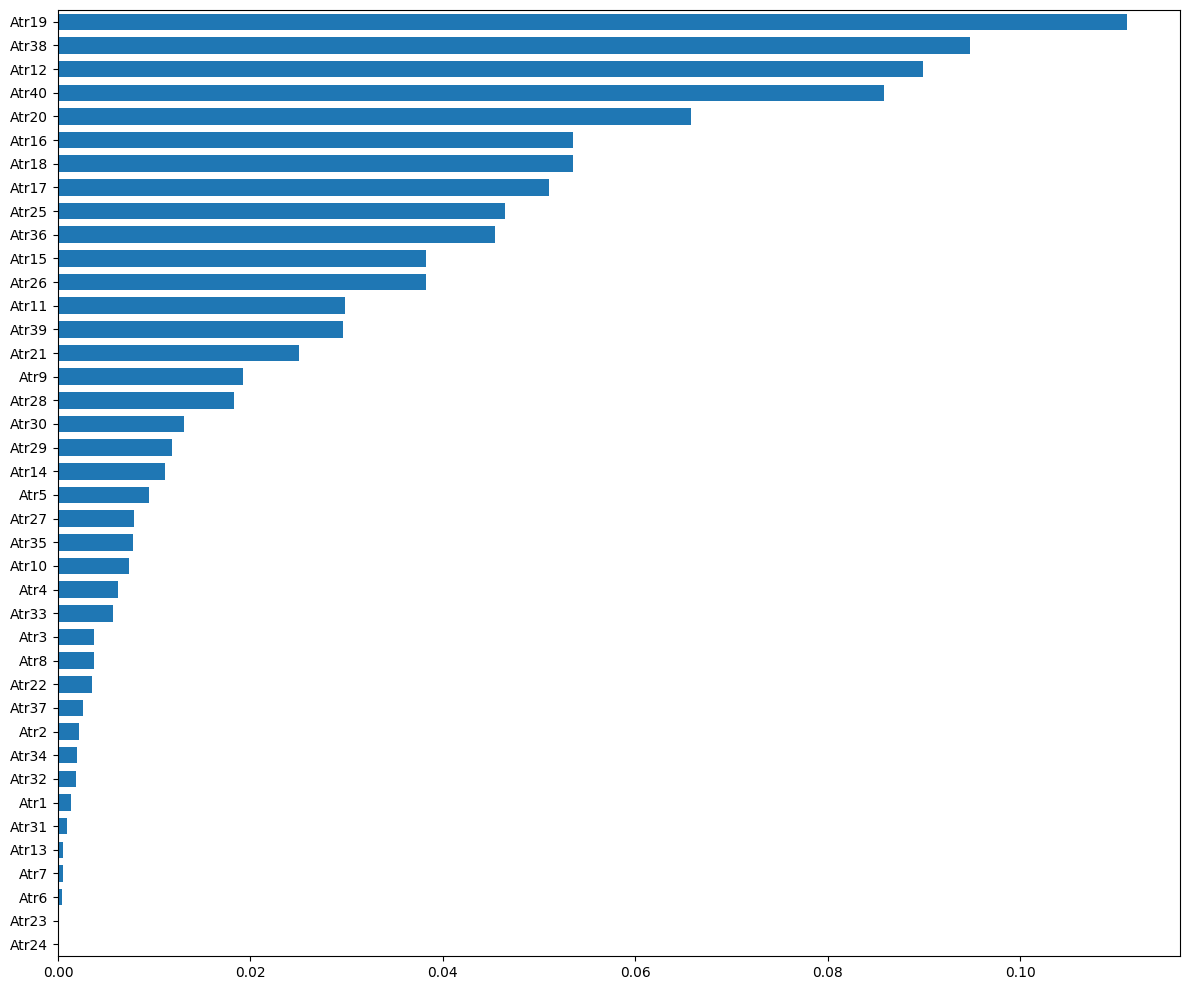

In [66]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 10))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
fig.tight_layout()
plt.show()

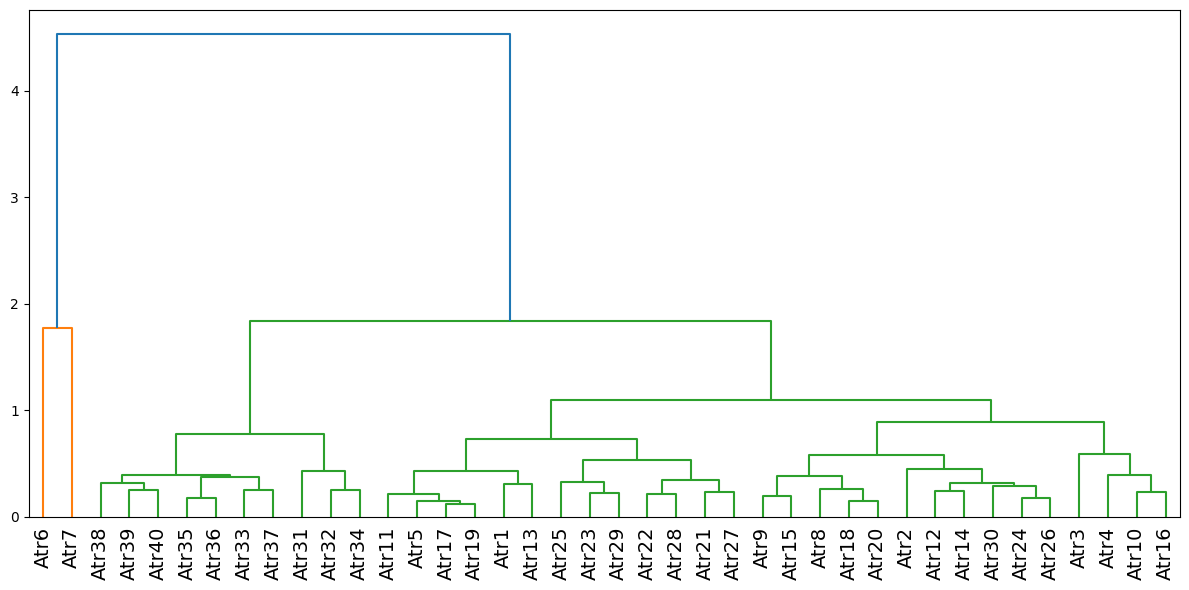

In [67]:
# plt modülünü matplotlib kütüphanesinden içe aktar
import matplotlib.pyplot as plt
# spearmanr ve hierarchy fonksiyonlarını scipy kütüphanesinden içe aktar
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

# 1 satır ve 1 sütundan oluşan bir figür ve bir eksen oluştur
# figürün boyutunu 12x6 olarak ayarla
fig, ax1  = plt.subplots(1, 1, figsize=(12, 6))
# X veri kümesinin Spearman korelasyon matrisini hesapla
corr = spearmanr(X).correlation
# Korelasyon matrisi üzerinde hiyerarşik kümeleme yap
# Ward yöntemini kullanarak benzerlik ölçütü olarak kareli öklid uzaklığını al
corr_linkage = hierarchy.ward(corr)
# Hiyerarşik kümelemeyi bir dendrogram ile göster
# Eksen olarak ax1'i, etiket olarak feature_names'i kullan
# Yaprakların yazı boyutunu 14, dönüş açısını 90 derece yap
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1, leaf_font_size = 14,
                              leaf_rotation=90)
# Dendrogramın sıralamasını bir dizi olarak al
dendro_idx = np.arange(0, len(dendro['ivl']))
# Figürün düzenini sıkılaştır
fig.tight_layout()
# Figürü göster
plt.show()


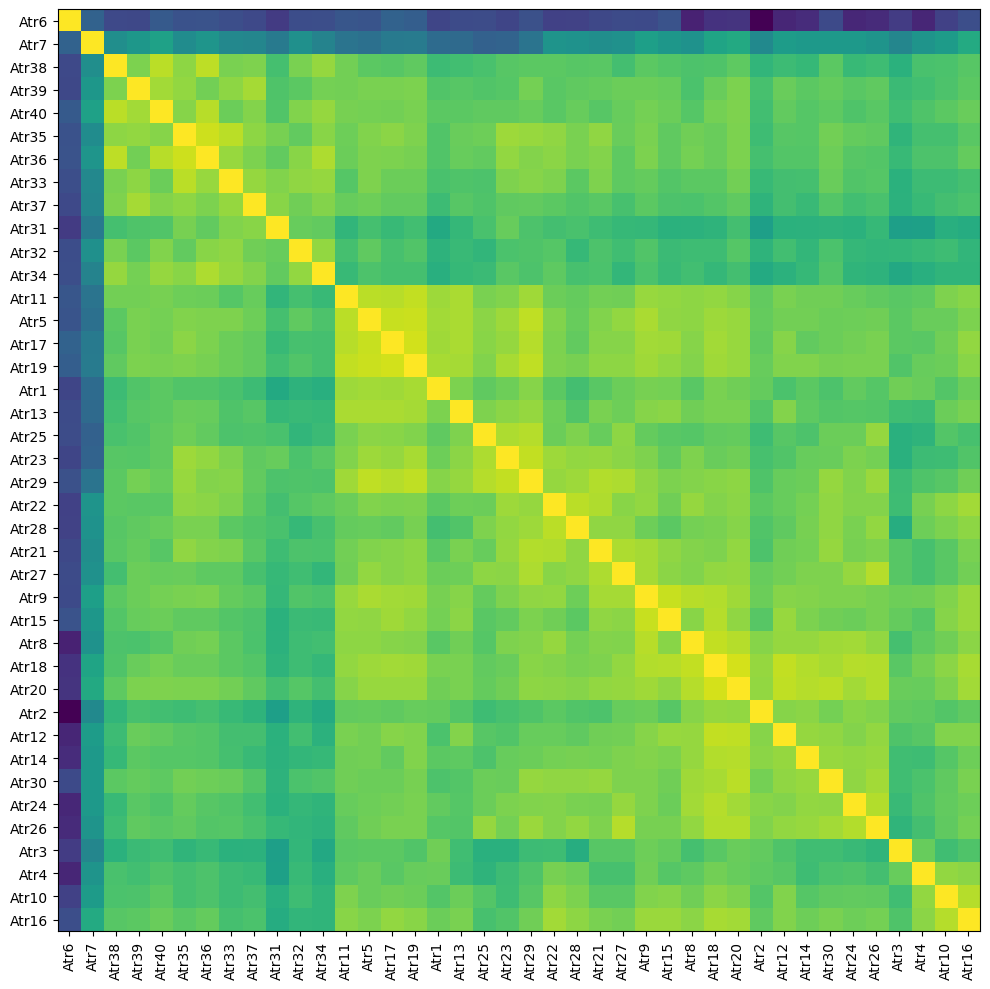

In [68]:
# plt modülünü matplotlib kütüphanesinden içe aktar
import matplotlib.pyplot as plt
# spearmanr ve hierarchy fonksiyonlarını scipy kütüphanesinden içe aktar
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

# 1 satır ve 1 sütundan oluşan bir figür ve bir eksen oluştur
# figürün boyutunu 10x10 olarak ayarla
fig, ax2 = plt.subplots(1, 1, figsize=(10, 10))
# X veri kümesinin Spearman korelasyon matrisini hesapla
corr = spearmanr(X).correlation
# Korelasyon matrisi üzerinde hiyerarşik kümeleme yap
# Ward yöntemini kullanarak benzerlik ölçütü olarak kareli öklid uzaklığını al
corr_linkage = hierarchy.ward(corr)
# Hiyerarşik kümelemeyi bir dendrogram ile göster
# Eksen olarak ax1'i, etiket olarak feature_names'i kullan
# Yaprakların yazı boyutunu 14, dönüş açısını 90 derece yap
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1, leaf_font_size = 14,
                              leaf_rotation=90)
# Dendrogramın sıralamasını bir dizi olarak al
dendro_idx = np.arange(0, len(dendro['ivl']))

# Korelasyon matrisini bir ısı haritası olarak göster
# Eksen olarak ax2'yi kullan
# Matrisin sadece dendrogramın sıralamasına göre seçilen bölümünü göster
ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
# x ve y eksenlerinin değerlerini dendrogramın sıralamasına göre ayarla
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
# x ve y eksenlerinin etiketlerini dendrogramın etiketlerine göre ayarla
# x ekseninin etiketlerini dikey olarak döndür
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
# Figürün düzenini sıkılaştır
fig.tight_layout()
# Figürü göster
plt.show()


## SVM sınıflandırma

In [69]:
#to calculate time complexity
start = time.time()

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
#Predict the response for test dataset
pred_clf = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# clf.score(X_test,y_test)
# Model Accuracy: how often is the classifier correct?
# print("Accuracy:", metrics.accuracy_score(y_test, pred_clf))
print("Accuracy2:", clf.score(X_test,y_test))

Accuracy2: 1.0


In [71]:
end = time.time()
print("SVM execution time: {0:.5} seconds \n".format(end-start))

SVM execution time: 6.8344 seconds 



In [72]:
rf_cf_matrix = confusion_matrix(y_test, pred_rfc)
make_confusion_matrix(rf_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = RF_TITLE)

ValueError: ignored

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, pred_clf)
make_confusion_matrix(svm_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = SVM_TITLE)

ValueError: ignored

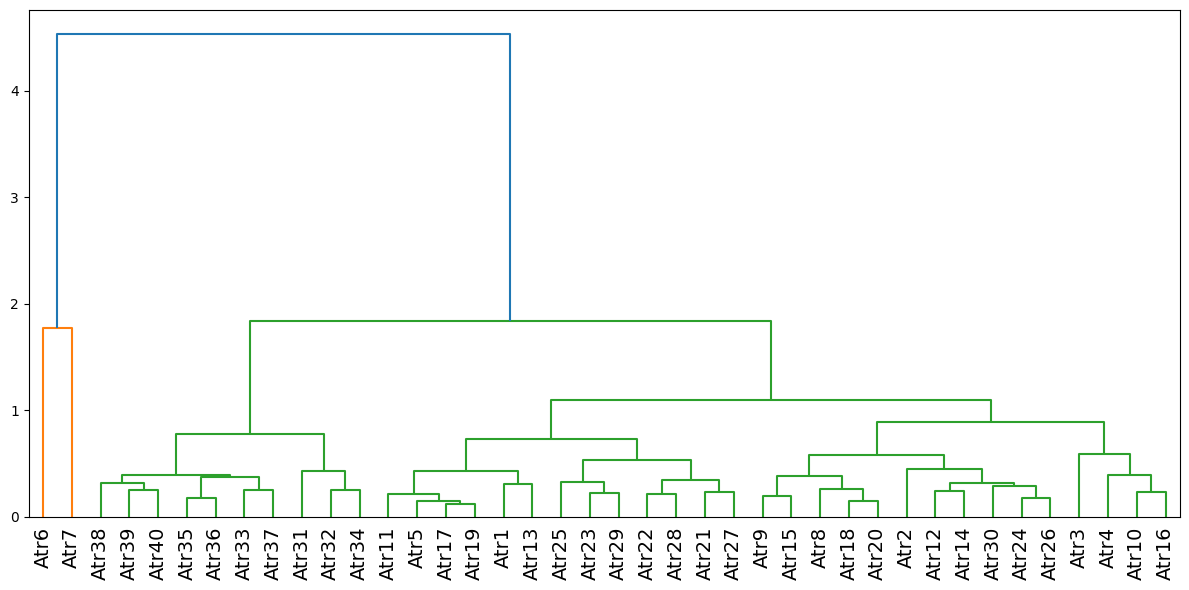

In [73]:
# plt modülünü matplotlib kütüphanesinden içe aktar
import matplotlib.pyplot as plt
# spearmanr ve hierarchy fonksiyonlarını scipy kütüphanesinden içe aktar
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

# 1 satır ve 1 sütundan oluşan bir figür ve bir eksen oluştur
# figürün boyutunu 12x6 olarak ayarla
fig, ax1  = plt.subplots(1, 1, figsize=(12, 6))
# X veri kümesinin Spearman korelasyon matrisini hesapla
corr = spearmanr(X).correlation
# Korelasyon matrisi üzerinde hiyerarşik kümeleme yap
# Ward yöntemini kullanarak benzerlik ölçütü olarak kareli öklid uzaklığını al
corr_linkage = hierarchy.ward(corr)
# Hiyerarşik kümelemeyi bir dendrogram ile göster
# Eksen olarak ax1'i, etiket olarak feature_names'i kullan
# Yaprakların yazı boyutunu 14, dönüş açısını 90 derece yap
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1, leaf_font_size = 14,
                              leaf_rotation=90)
# Dendrogramın sıralamasını bir dizi olarak al
dendro_idx = np.arange(0, len(dendro['ivl']))
# Figürün düzenini sıkılaştır
fig.tight_layout()
# Figürü göster
plt.show()


 ## Naive Bayes

In [74]:
# GaussianNB sınıflandırıcısını oluştur ve eğit
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [75]:
# Test setindeki veri noktalarını tahmin et
y_pred = gnb.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9767441860465116


In [76]:
rf_cf_matrix = confusion_matrix(y_test, pred_rfc)
make_confusion_matrix(rf_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = RF_TITLE)

ValueError: ignored

## logistic regression

In [ ]:
# LogisticRegression sınıflandırıcısını oluştur ve eğit
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Test setindeki veri noktalarını tahmin et
y_pred = lr.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9767441860465116


## KNN

In [ ]:
# KNeighborsClassifier sınıflandırıcısını oluştur ve eğit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Test setindeki veri noktalarını tahmin et
y_pred = knn.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9767441860465116


## decision tree

In [ ]:
# DecisionTreeClassifier sınıflandırıcısını oluştur ve eğit
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Test setindeki veri noktalarını tahmin et
y_pred = dtc.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9534883720930233


## %80 - %20 SVC

In [ ]:
# SVC sınıflandırıcısını oluştur ve eğit
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)


SVC()

In [ ]:
# Test setindeki veri noktalarını tahmin et
y_pred = svc.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9767441860465116


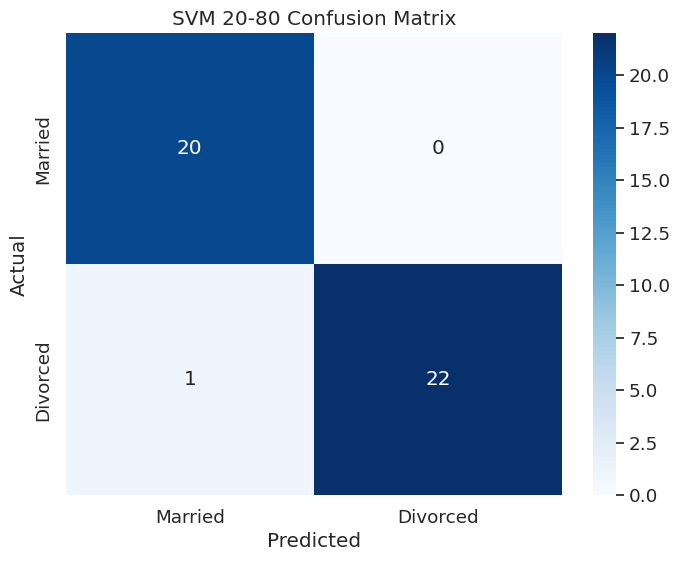

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60 - %40 Perception

In [ ]:
# Veri kümesini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Perceptron sınıflandırıcısını oluştur
from sklearn.linear_model import Perceptron
perceptron = Perceptron(eta0=0.0001, tol=0.001)

# Eğitim verisiyle eğit
perceptron.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = perceptron.predict(X_test)

# Doğruluk ve karışıklık matrisini hesapla ve yazdır
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:")
print(cm)

Accuracy: 0.9264705882352942
Confusion matrix:
[[27  5]
 [ 0 36]]


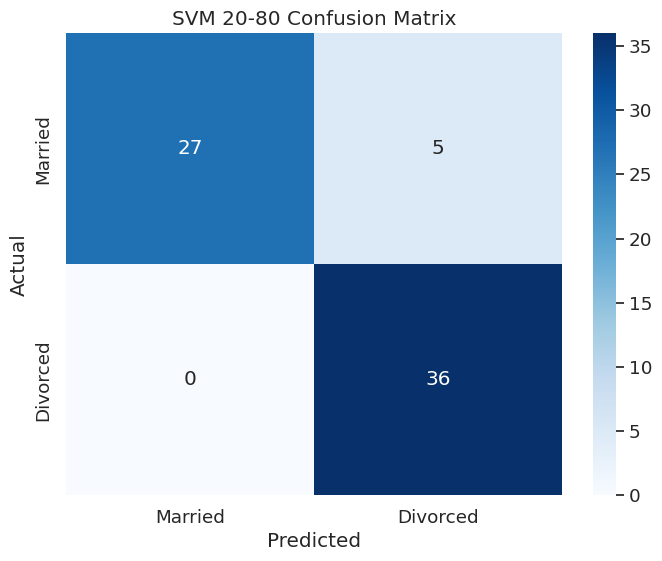

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60 - %40 Naive Bayes

In [ ]:
# Veri kümesini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# GaussianNB sınıflandırıcısını oluştur ve eğit
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# eğitim verisi ile eğit
gnb.fit(X_train, y_train)

# Test setindeki veri noktalarını tahmin et
y_pred = gnb.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


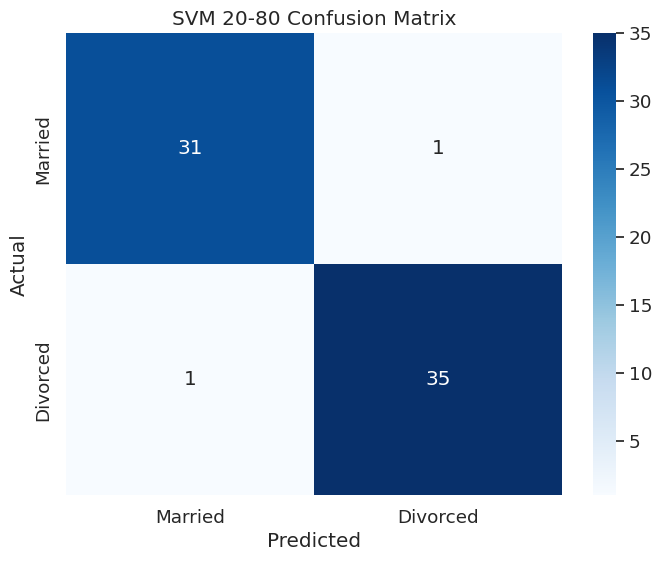

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60 - %40 logistic resgression

In [ ]:
# Veri kümesini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# LogisticRegression sınıflandırıcısını oluştur ve eğit
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Test setindeki veri noktalarını tahmin et
y_pred = lr.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


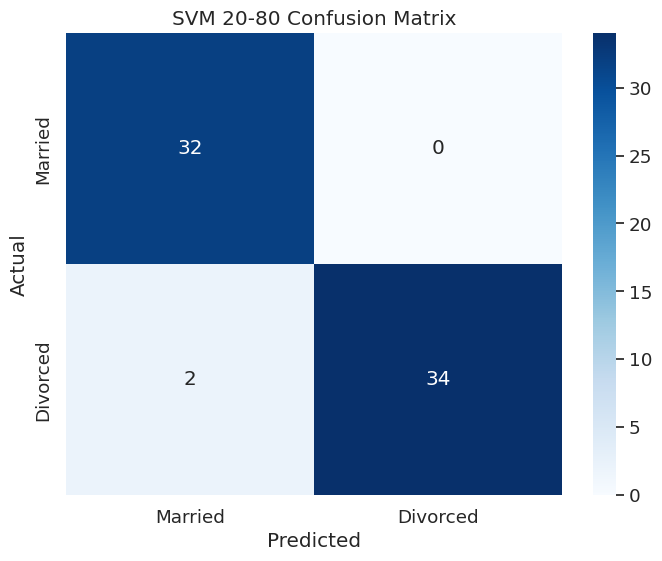

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60 - %40 KNN

In [ ]:
# Veri kümesini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# KNeighborsClassifier sınıflandırıcısını oluştur ve eğit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test setindeki veri noktalarını tahmin et
y_pred = knn.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


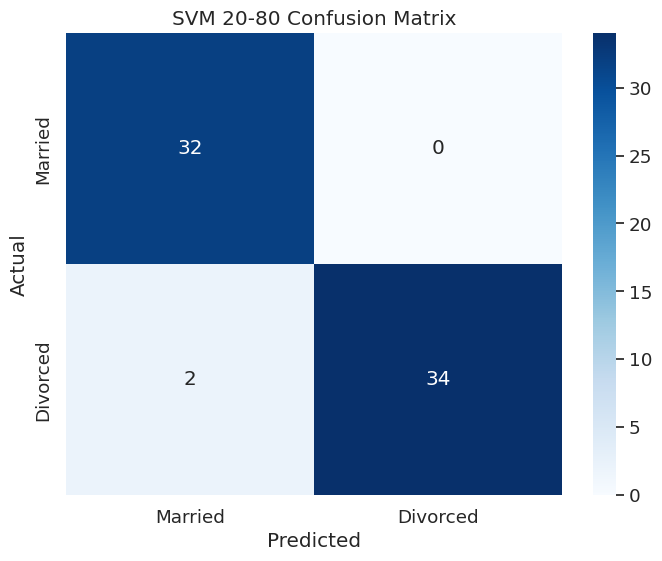

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60- %40 decision tree

In [ ]:
# DecisionTreeClassifier sınıflandırıcısını oluştur ve eğit
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

# Test setindeki veri noktalarını tahmin et
y_pred = dtc.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9558823529411765


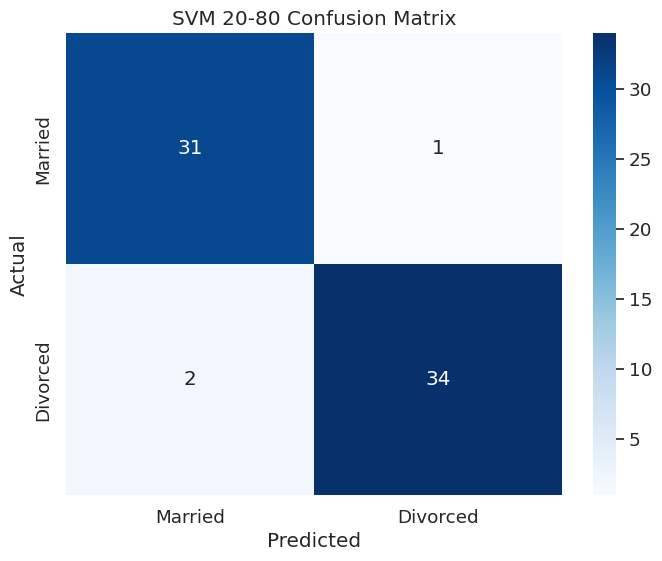

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)

## %60- %40 SVC

In [ ]:
# SVC sınıflandırıcısını oluştur ve eğit
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)

# Test setindeki veri noktalarını tahmin et
y_pred = svc.predict(X_test)

# Doğruluğu ölç
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        36

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



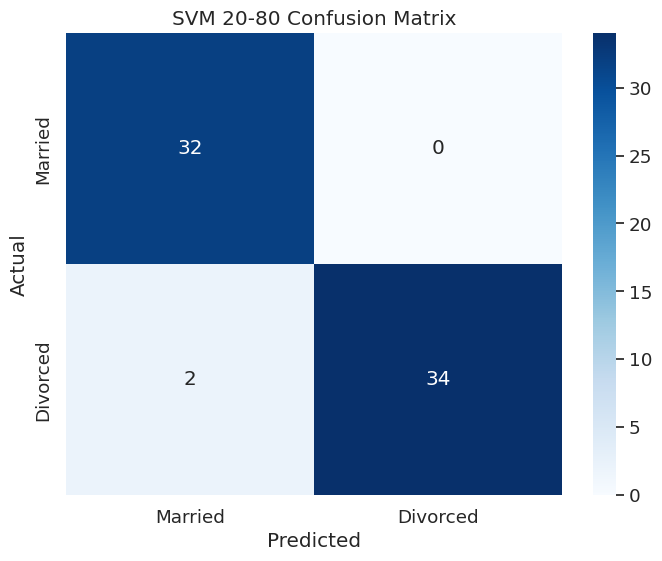

In [ ]:
svm_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(svm_cf_matrix,
                      group_names = LABELS,
                      categories = CATEGORIES,
                      title = SVM_TITLE)